In [7]:
import sqlite3

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE sales1 (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

sample_data = [
    ("Apple", 10, 50),
    ("Banana", 5, 20),
    ("Orange", 8, 25),
    ("Apple", 6, 30),
    ("Banana", 7, 28),
    ("Orange", 4, 13)
]

cursor.executemany("INSERT INTO sales1 (product, quantity, price) VALUES (?, ?, ?)", sample_data)

conn.commit()
conn.close()


In [8]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("sales_data.db")

query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales1 
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
print(df)

conn.close()


  product  total_qty  revenue
0   Apple         16    680.0
1  Banana         12    296.0
2  Orange         12    252.0


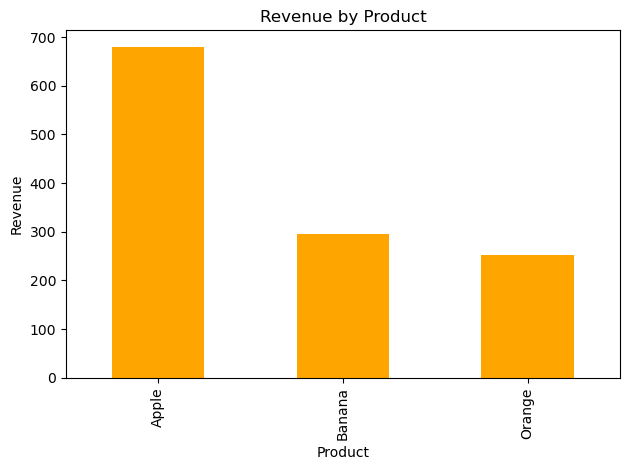

In [15]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='revenue', color='orange', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()

plt.savefig("sales1_chart.png")
plt.show()
